In [7]:
# Author       : Utkarsh Kulshrestha
# E-Mail       : kuls.utkarsh1205@gmail.com
# Contact      : +91-8197094433
# Designation  : Artificial Intelligence Engineer
# Regression Analysis for House Prices

## Import the Libraries and Data

In [1]:
# Let's import our libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Since we are going to mae lot of visualization, let's set some visualization parameters in order to have same plots size
plt.rcParams['figure.figsize'] = [12,6]
sns.set_style('darkgrid')

In [3]:
#house = pd.read_excel('/home/utkarsh/LearnBay/ML_Python/Maison.xlsx') ## Reading the data
house = pd.read_csv("/home/utkarsh/LearnBay/ML_Python/Maison.csv")

In [4]:
house.head()

,PRIX,SUPERFICIE,CHAMBRES,SDB,ETAGES,ALLEE,SALLEJEU,CAVE,GAZ,AIR,GARAGES,SITUATION
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


# Data Transformations & Analysis

In [5]:
# Since the columns are in french, in order to make them more readable, let's translate them into English
house = house.rename(index = str, columns = {'PRIX':'price','SUPERFICIE': 'area','CHAMBRES': 'rooms', 
                         'SDB': 'bathroom', 'ETAGES': 'floors','ALLEE': 'driveway',
                         'SALLEJEU':'game_room', 'CAVE': 'cellar', 
                         'GAZ': 'gas', 'AIR':'air', 'GARAGES': 'garage', 'SITUATION': 'situation'})

In [6]:
house.head()

,price,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


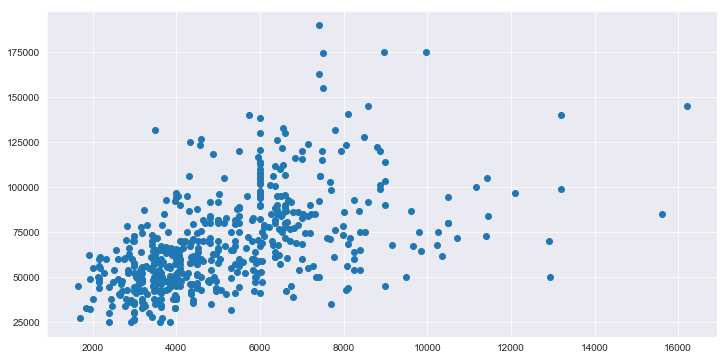

In [7]:
# Let's see ig we have a linear relation between price and area
#sns.palettes(house['area'], house['price'], palette = 'viridis')
plt.scatter(house['area'], house['price'])
plt.show()

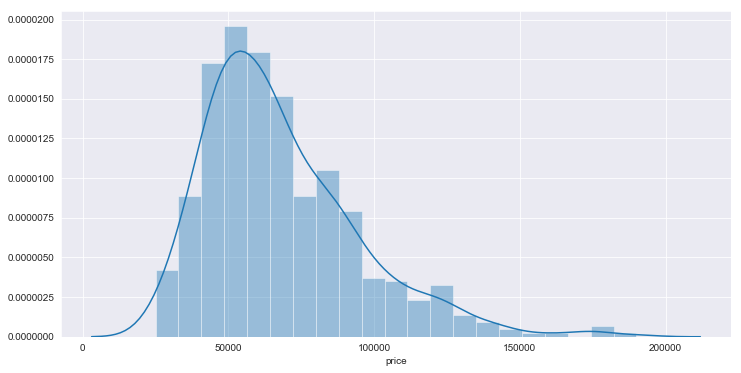

In [8]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(house['price'])
plt.show()

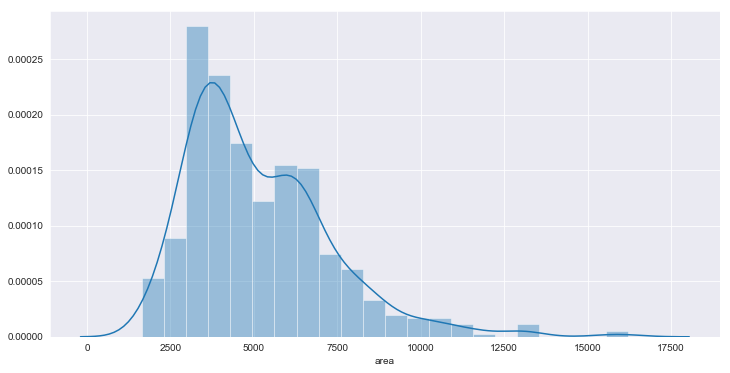

In [9]:
sns.distplot(house['area'])
plt.show()

In [10]:
# Import the libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [11]:
# We now instatiate a Linear Regression object
lm = LinearRegression()

In [12]:
# let's do the split of the dataset
house.columns
X = house[['area', 'rooms', 'bathroom', 'floors', 'driveway', 'game_room',
       'cellar', 'gas', 'air', 'garage', 'situation']]
y = house['price']

In [13]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=101)

In [14]:
## Let's chec the head of some of these splits
X_test.head()
# We see that they are randomly selected

,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
225,2800,3,2,2,0,0,1,0,1,1,0
18,3450,1,1,1,1,0,0,0,0,0,0
48,4960,4,1,3,0,0,0,0,0,0,0
355,10269,3,1,1,1,0,0,0,0,1,1
350,9860,3,1,1,1,0,0,0,0,0,0


In [15]:
# Now let's build the model using sklearn
#lm.fit(X_test,y_test)

In [16]:
# Now let's look at the coefficients
#print(lm.coef_)
# it would be nicer if we can put them together in a dataframe

In [17]:
#coef = pd.DataFrame(lm.coef_, X.columns, columns = ['Coefficients'])
#coef

In [18]:
import statsmodels.api as sm

In [19]:
# Unlike sklearn that adds an intercept to our data for the best fit, statsmodel doesn't. We need to add it ourselves
# Remember, we want to predict the price based off our features.
# X represents our predictor variables, and y our predicted variable.
# We need now to add manually the intercepts
X_endog = sm.add_constant(X_test)

In [28]:
res = sm.OLS(x_train, y_train)
res.fit()

In [29]:
res.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     29.45
Date:                Sat, 25 May 2019   Prob (F-statistic):           2.53e-32
Time:                        22:31:14   Log-Likelihood:                -1795.1
No. Observations:                 164   AIC:                             3614.
Df Residuals:                     152   BIC:                             3651.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -703.0200   5457.714     -0.129      0.898   -1.15e+04    1.01e+04
area           2.7743      0.567      4.890      0.000       1.653       3.895
rooms        478.1260   1666.410      0.287      0.775   -2814.190    3770.442
bathroom    1.486e+04   2651.101      5.603      0.000    9617.474    2.01e+04
floors      6304.8889   1815.635      3.473      0.001    2717.749    9892.029
driveway    1.103e+04   3235.995      3.408      0.001    4636.420    1.74e+04
game_room   4161.6525   3287.342      1.266      0.207   -2333.129    1.07e+04
cellar      1.005e+04   2689.056      3.736      0.000    4732.622    1.54e+04
gas         7845.2539   6221.756      1.261      0.209   -4447.033    2.01e+04
air         1.243e+04   2704.379      4.596      0.000    7087.433    1.78e+04
garage      2115.0997   1396.503      1.515      0.132    -643.963    4874.163
situation   7395.1917   3006.773      2.460      0.015    1454.729    1.33e+04
==============================================================================
Omnibus:                       17.037   Durbin-Watson:                   2.241
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.373
Skew:                           0.535   Prob(JB):                     6.90e-07
Kurtosis:                       4.734   Cond. No.                     3.20e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
#predictions = lm.predict(X_test)

In [23]:
# To check the quality of our model, let's plot it
#sns.scatterplot(y_test, predictions)

In [24]:
# Evaluation metrics
# Mean Absolute Error (MAE)
# Mean Squared Error (MSE)
# Root Mean Squared Error(RMSE)
#import numpy as np
#from sklearn import metrics

#print('MAE :', metrics.mean_absolute_error(y_test, predictions))
#print('MSE :', metrics.mean_squared_error(y_test, predictions))
#print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE : 10248.782807401953
MSE : 188311345.17713058
RMSE : 13722.658094448414

In [32]:
X_endog_test = sm.add_constant(X_test)
model = res.fit()
predictions = model.predict(X_endog_test)

In [33]:
predictions

225     75410.520914
18      41536.248482
48      48739.809721
355     70920.597455
350     60275.626153
365     89069.317000
39      55052.945874
398     74011.953356
312     70024.794910
171     35146.581286
288     43879.789081
8       60444.801997
432     61303.273032
313     73080.381761
100     78011.694828
178     67133.770794
452     79715.361294
83      52444.990219
385     73665.978704
261     59848.001234
114     74103.976232
117     89769.410431
81      36678.772947
118     78171.236030
246     44212.702510
267     42430.516279
470     60992.136124
291     52438.342275
372    102564.641240
55      42486.001850
           ...      
111     33897.611764
205     54626.850684
516     93624.036443
534     71832.868057
379     95049.502477
127     95155.674344
38      86201.253209
389     93378.342427
406     77063.894452
360    109017.504961
91      72058.452526
501    101491.718753
209     58182.954790
390     81280.563216
57      88470.063553
216    112342.878958
526     97639